In [22]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import opensea.opensea_events as Events
import opensea.database as Database

In [23]:
#update opensea events
Events.update_opensea_events('ape-gang')
Events.update_opensea_events('ape-gang-old')



-----------------------------------------------------------
Getting ape-gang sales data...
0 sales found.
write sales to MongoDB
-----------------------------------------------------------
Getting ape-gang transfers data...
0 transfers found.
-----------------------------------------------------------
Getting ape-gang listings data...
1 API calls made
15 listings found.
updating ape-gang_listings with 15 documents.
-----------------------------------------------------------
Getting ape-gang cancellation data...
1 API calls made
0 cancellations found.
-----------------------------------------------------------
Getting ape-gang-old sales data...
0 sales found.
write sales to MongoDB
-----------------------------------------------------------
Getting ape-gang-old transfers data...
0 transfers found.
-----------------------------------------------------------
Getting ape-gang-old listings data...
1 API calls made
2 listings found.
updating ape-gang-old_listings with 2 documents.
----------

In [24]:
#read from mongoDB
ag_sales = Database.read_mongo('ape-gang_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
ag_old_sales = Database.read_mongo('ape-gang-old_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
apes=Database.read_mongo('ape-gang-old_traits',return_df=True)

sales = ag_sales.append(ag_old_sales)
sales

,sale_id,asset_id,sale_quantity,collection,image_url,time,event_type,seller_wallet,buyer_wallet,block_hash,sale_currency,sale_price
0,2698375415,5751,1,ape-gang,https://lh3.googleusercontent.com/e3L-yKjMmysf...,2022-01-01 07:30:14.840,successful,0x0bc2dab96f47dac7c58db9469402cf3c7775a537,0x6b3fc213d1ebe98e53cc823503c8c16bc68a5489,0x52c648accce24fe71a72ca26b9a0dd2641f1497ea323...,ETH,0.260
1,2642866220,9746,1,ape-gang,https://lh3.googleusercontent.com/UHbf8YNt9NL2...,2021-12-28 06:34:59.230,successful,0x632e54a2b3ff7a8bc77f012a774badc023e5091b,0x48d5e28686a33341fd9bb0f255d597ea819adca0,0x687bdc23d21358167f709b85efeeba89fb52bc634542...,ETH,0.660
2,2663109546,740,1,ape-gang,https://lh3.googleusercontent.com/PYCWQr6z5IAE...,2021-12-29 19:59:40.462,successful,0xdd5b2dd0d82c06f2fd2f3ea0ebfb36d8d271a1ca,0x7ac24abf71965b32f98fea17d64db28e4c948df6,0x0b75b8ab103d39a5869f7546f423c1aa5365b3fcd797...,ETH,0.290
3,2589740656,3905,1,ape-gang,https://lh3.googleusercontent.com/vE59nS8MJLwV...,2021-12-24 03:48:42.417,successful,0xe823c38b4461fee1632bd4d4fd515dd81fb61dd4,0x14b94d4e8ae208e015c4657696eca6a0a668d30e,0x866b844eb0ccebab8ab31651b61c6a77ce020937c028...,WETH,0.250
4,2695862012,6459,1,ape-gang,https://lh3.googleusercontent.com/_2nDxDHlEtTt...,2022-01-01 02:55:09.867,successful,0xfc55ff1ce47029b40e54506bacb9a2e833754b80,0x2e73fa8cfb5c1cfbf0b3881a0e945594c03add1b,0xb25962997aaa04885e2d1214b20a2760799c984ff08e...,ETH,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
22294,3094052034,2267,1,ape-gang-old,https://lh3.googleusercontent.com/514Cb-_Oniyc...,2022-01-26 10:28:36.524,successful,0x0f33a5147457d9d1daef9aad83500dcef1394c13,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0xdfaf6fd0e74b4f184d1e79f6fa61e2f947acba6c9c94...,ETH,0.289
22295,3094043145,8873,1,ape-gang-old,https://lh3.googleusercontent.com/3xntj7ACVnUf...,2022-01-26 10:27:58.289,successful,0xb37d130b71945b652746d1c10f454afbf8444ba3,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0x7024c39935ec5e1255959f2e89492320c1914a50b11f...,ETH,0.280
22296,3094040673,8852,1,ape-gang-old,https://lh3.googleusercontent.com/EUKTxDPurBVD...,2022-01-26 10:27:47.400,successful,0xb37d130b71945b652746d1c10f454afbf8444ba3,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0x8cc15918c1dd4fd5781c31346d2b0125a122ddba6ffc...,ETH,0.279
22297,3082651507,6310,1,ape-gang-old,https://lh3.googleusercontent.com/Stjgm8Vvz2Qf...,2022-01-25 19:57:31.122,successful,0xbc62985faabed27a8f174cbd5ea1ee7b1ed8fc12,0x9207280d2190405f47e7e3070abe7083aa6f4e45,0x12b94beb43879c759e1980c5e7e044af3f3ae8be893e...,ETH,1.100


In [25]:
apes

,name,Clothes,Ears,Eyes,Fur,Hat,Mouth,asset_id,trait_n,Clothes_rarity,Ears_rarity,Eyes_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,trait_n_rarity,factoral_rarity,rarity_rank
0,ApeGang #4266,Hippie,NaN,Albino,Ghost,NaN,Joint,3491,4,0.0247,0.7565,0.0170,0.0007,0.3096,0.0325,0.3968,1565.722031,6
1,ApeGang #187,Magician,NaN,NaN,Alien,Cap,Drool Rainbow,3491,4,0.0277,0.7565,0.3104,0.0012,0.0175,0.0326,0.3968,964.315808,20
2,ApeGang #9891,NaN,NaN,Monocle,Alien,Laurel,Mustache,3491,4,0.2202,0.7565,0.0340,0.0012,0.0208,0.0302,0.3968,952.317968,22
3,ApeGang #2449,Vader,NaN,NaN,Robot,Vader,NaN,3491,3,0.0001,0.7565,0.3104,0.0035,0.0001,0.3141,0.2239,20297.907791,2
4,ApeGang #4348,Red Hawaiian Shirt,Diamond Stud,NaN,Ghost,Red NBA Headband,NaN,3491,4,0.0283,0.0483,0.3104,0.0007,0.0202,0.3141,0.3968,1543.041512,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ApeGang #1945,NaN,NaN,NaN,Brown,NaN,Snake,3491,2,0.2202,0.7565,0.3104,0.4242,0.3096,0.0330,0.0388,70.748432,9947
9996,ApeGang #184,NaN,Airpods,Monocle,Brown,NaN,NaN,3491,3,0.2202,0.0475,0.0340,0.4242,0.3096,0.3141,0.2239,68.243054,9975
9997,ApeGang #621,NaN,Diamond Stud,Scar,Brown,NaN,NaN,3491,3,0.2202,0.0483,0.0347,0.4242,0.3096,0.3141,0.2239,67.301035,9985
9998,ApeGang #4125,NaN,NaN,NaN,Brown,NaN,Grillz,3491,2,0.2202,0.7565,0.3104,0.4242,0.3096,0.0378,0.0388,66.900428,9987


In [26]:
day_n = 30
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=day_n)]
print(f"Age Gang {day_n} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")



Age Gang 30 day sale volume= 209.2Eth. With 515 sales and a median sale of 0.35 Eth


,sale_id,asset_id,sale_quantity,collection,image_url,time,event_type,seller_wallet,buyer_wallet,block_hash,...,trait_n,Clothes_rarity,Ears_rarity,Eyes_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,trait_n_rarity,factoral_rarity,rarity_rank
0,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0247,0.7565,0.0170,0.0007,0.3096,0.0325,0.3968,1565.722031,6
1,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0277,0.7565,0.3104,0.0012,0.0175,0.0326,0.3968,964.315808,20
2,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.2202,0.7565,0.0340,0.0012,0.0208,0.0302,0.3968,952.317968,22
3,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,3,0.0001,0.7565,0.3104,0.0035,0.0001,0.3141,0.2239,20297.907791,2
4,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0283,0.0483,0.3104,0.0007,0.0202,0.3141,0.3968,1543.041512,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,310489276,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-07-19 07:20:02.700,successful,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0xc0dff2b86403af1e8c9066cb85854f494ef4a25d,0xd12f3c28ac6e7ea53a12ca1b898dc7d0d0cd9735e6fa...,...,2,0.2202,0.7565,0.3104,0.4242,0.3096,0.0330,0.0388,70.748432,9947
49996,310489276,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-07-19 07:20:02.700,successful,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0xc0dff2b86403af1e8c9066cb85854f494ef4a25d,0xd12f3c28ac6e7ea53a12ca1b898dc7d0d0cd9735e6fa...,...,3,0.2202,0.0475,0.0340,0.4242,0.3096,0.3141,0.2239,68.243054,9975
49997,310489276,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-07-19 07:20:02.700,successful,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0xc0dff2b86403af1e8c9066cb85854f494ef4a25d,0xd12f3c28ac6e7ea53a12ca1b898dc7d0d0cd9735e6fa...,...,3,0.2202,0.0483,0.0347,0.4242,0.3096,0.3141,0.2239,67.301035,9985
49998,310489276,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-07-19 07:20:02.700,successful,0x0b038779c3fad5767d0257107c8d9b21dabb5ed7,0xc0dff2b86403af1e8c9066cb85854f494ef4a25d,0xd12f3c28ac6e7ea53a12ca1b898dc7d0d0cd9735e6fa...,...,2,0.2202,0.7565,0.3104,0.4242,0.3096,0.0378,0.0388,66.900428,9987


In [27]:
#join sales and apes on asset_id
recent_sales = pd.merge(sales,apes,on='asset_id')
#recent_sales = recent_sales[['asset_id','sale_price','time']].merge(apes, on='asset_id',how='left').sort_values('sale_price',ascending=False)
recent_sales.head(10)

,sale_id,asset_id,sale_quantity,collection,image_url,time,event_type,seller_wallet,buyer_wallet,block_hash,...,trait_n,Clothes_rarity,Ears_rarity,Eyes_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,trait_n_rarity,factoral_rarity,rarity_rank
0,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0247,0.7565,0.0170,0.0007,0.3096,0.0325,0.3968,1565.722031,6
1,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0277,0.7565,0.3104,0.0012,0.0175,0.0326,0.3968,964.315808,20
2,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.2202,0.7565,0.0340,0.0012,0.0208,0.0302,0.3968,952.317968,22
3,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,3,0.0001,0.7565,0.3104,0.0035,0.0001,0.3141,0.2239,20297.907791,2
4,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0283,0.0483,0.3104,0.0007,0.0202,0.3141,0.3968,1543.041512,9
5,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0227,0.7565,0.3104,0.0007,0.0187,0.0286,0.3968,1568.128951,5
6,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,3,0.0233,0.7565,0.3104,0.0481,0.0015,0.3141,0.2239,742.568648,38
7,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,5,0.0045,0.7565,0.0322,0.4242,0.0036,0.0309,0.2848,570.608852,51
8,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,4,0.0061,0.7565,0.0336,0.0035,0.0202,0.3141,0.3968,535.941305,54
9,701341506,3491,1,ape-gang-old,https://lh3.googleusercontent.com/0Qt8kqLel3zp...,2021-08-31 00:24:17.214,successful,0x4b36d28e33a3159c0aa74337a03637e06d0f1b98,0x4f3553aa0789cbfffa469758284190cd072163bc,0x346ef741311925e49e70d46c0606243f1217a79e346e...,...,6,0.0224,0.0520,0.0315,0.4242,0.0036,0.0316,0.0546,425.715402,87


In [37]:
apes.to_csv('apes.csv')

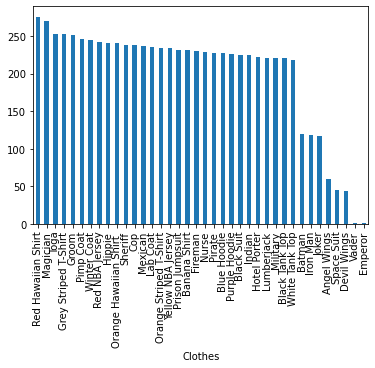

None


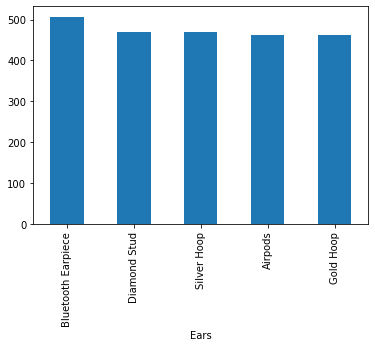

None


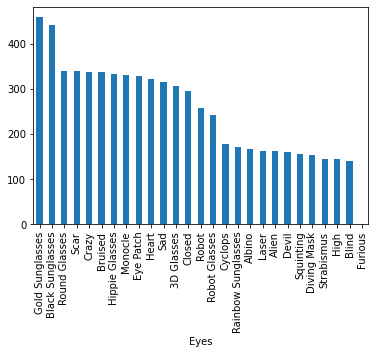

None


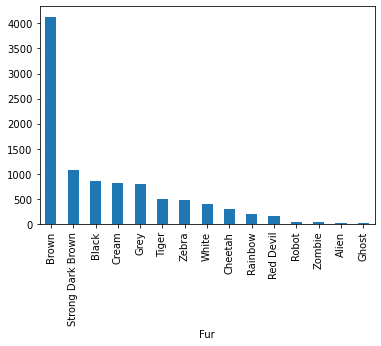

None


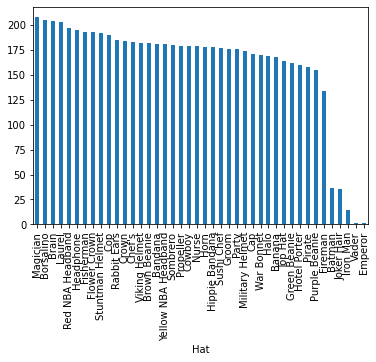

None


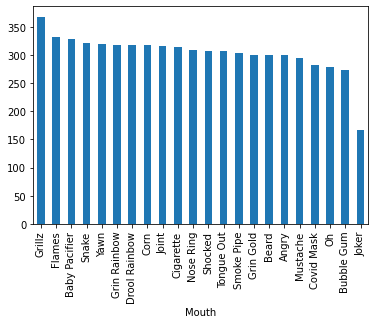

None


In [34]:
trait_list = ['Clothes','Ears','Eyes','Fur','Hat','Mouth']
for i in trait_list:
    plt.figure()
    recent_sales.groupby([i])['sale_price'].agg('sum').sort_values(ascending=False).plot(kind='bar')
    print(plt.show())

In [29]:
trait_price = pd.DataFrame()
for trait in trait_list:
    for i in recent_sales[trait].dropna().unique():
        df=recent_sales[recent_sales[trait]==i]
        trait_price= trait_price.append({'trait_class':trait,
                            'trait':i,
                            'num_sales':df.shape[0],
                            'median_price':df['sale_price'].median(),
                            '30day_volume': df['sale_price'].sum()},
                           ignore_index=True)
        
trait_price=trait_price.sort_values('median_price',ascending=False)
trait_price['trait_name']= trait_price['trait'].str.cat(' '+trait_price['trait_class'])

trait_price

,trait_class,trait,num_sales,median_price,30day_volume,trait_name
0,Clothes,Hippie,1235.0,0.1,240.7262,Hippie Clothes
94,Hat,Chef's,940.0,0.1,183.2248,Chef's Hat
96,Hat,Borsalino,1050.0,0.1,204.6660,Borsalino Hat
97,Hat,Sombrero,925.0,0.1,180.3010,Sombrero Hat
98,Hat,Horn,915.0,0.1,178.3518,Horn Hat
...,...,...,...,...,...,...
50,Eyes,Laser,835.0,0.1,162.7582,Laser Eyes
51,Eyes,Black Sunglasses,2265.0,0.1,441.4938,Black Sunglasses Eyes
52,Eyes,Cyclops,915.0,0.1,178.3518,Cyclops Eyes
53,Eyes,Bruised,1725.0,0.1,336.2370,Bruised Eyes


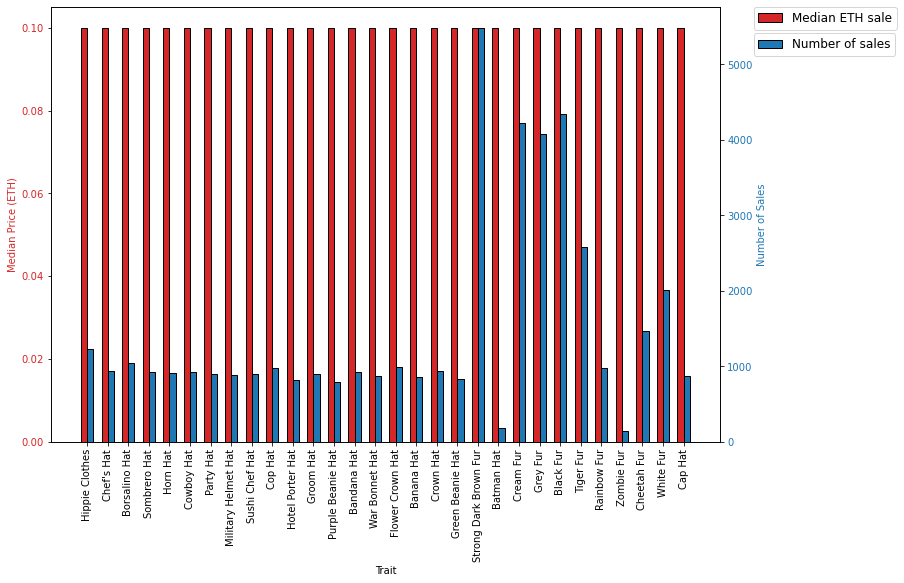

None


In [30]:
#make a plot of survival data
top_n = 30
barWidth = 0.3
x1 = np.arange(top_n)
x2 = [x + barWidth for x in x1]

fig, ax1 = plt.subplots(figsize=(12,8))
color1 = 'tab:red'
ax1.set_xlabel('Trait')
ax1.set_ylabel('Median Price (ETH)', color=color1)
ax1.bar(x1, trait_price['median_price'].iloc[0:top_n], width = barWidth, color = color1, edgecolor = 'black', label='Median ETH sale')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx() 
color2 = 'tab:blue'
ax2.set_ylabel('Number of Sales', color=color2)  # we already handled the x-label with ax1
ax2.bar(x2, trait_price['num_sales'].iloc[0:top_n], width = barWidth, color = color2, edgecolor = 'black', label='Number of sales')
ax2.tick_params(axis='y', labelcolor=color2)

#labels for plot
plt.xticks([r + barWidth/2 for r in range(top_n)], trait_price['trait_name'].iloc[0:top_n],rotation =90)
for label in ax1.get_xticklabels():
      label.set_rotation(90)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 0.94), loc='upper left', borderaxespad=0,fontsize=12)
#plt.title(f'Survival rate of titanic passengers by {discrete_var}')
print(plt.show())

In [31]:
import seaborn as sns
palette

NameError: name 'palette' is not defined

In [ ]:
recent_sales['day'] = recent_sales.time.dt.date
for trait in trait_list:
    df = pd.DataFrame(recent_sales.groupby([trait,'day'],dropna=False)['sale_price'].agg('sum')).reset_index()#.sort_values(ascending=False).plot(kind='bar')
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='sale_price')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('ApeGang Volume (ETH)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang daily volume by {trait}')
    print(plt.show())



In [ ]:
for trait in trait_list:
    df = pd.DataFrame(recent_sales[[trait,'day']].value_counts(dropna=False)).reset_index().rename(columns={0:'n_sales'})
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='n_sales')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('Number of Ape Gang Sales')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang Number of Daily by {trait}')
    print(plt.show())
    
                      
    

In [ ]:
collection = 'cool-cats-nft'
sales_period = 7

Events.update_opensea_events(collection)
sales = Database.read_mongo(f'{collection}_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=sales_period)]
print(f"{collection} {sales_period} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")




In [ ]:
#plot the sales volume by time using plotly
    

KeyError: 'asset_id'